In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
sn.set()
from scipy import stats
from numpy import median
import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

#  **Data Cleaning**

In [3]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train.shape

(8693, 14)

In [7]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
train = train.dropna()
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [10]:
# group = train.PassengerId.str[:4]
# people = train.PassengerId.str[5:7]


In [11]:
# train['Group'] = group
# train['People'] = people
# train.head()

In [12]:
train = train.astype({"CryoSleep": 'category',"PassengerId": 'category', 'Cabin': 'category', 'VIP':'category','Age':'float64'})

In [13]:
# deck = []
# num  = []
# side = []
# index = 0
# type(train.Cabin)
# for i, v in enumerate(train.Cabin):
#     split_for_deck = str(v).split('/')[0]
#     split_for_num = str(v).split('/')[1]
#     split_for_side = str(v).split('/')[2]
#     deck.append(split_for_deck)
#     num.append(split_for_num)
#     side.append(split_for_side)



In [14]:
# train['Deck'] = deck
# train['NumberOfPeople'] = num
# train['Side'] = side


In [15]:
train.dtypes

PassengerId       object
HomePlanet        object
CryoSleep       category
Cabin           category
Destination       object
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name              object
Transported         bool
dtype: object

# **Exploratory Data Analysis**

<AxesSubplot: xlabel='Age', ylabel='Transported'>

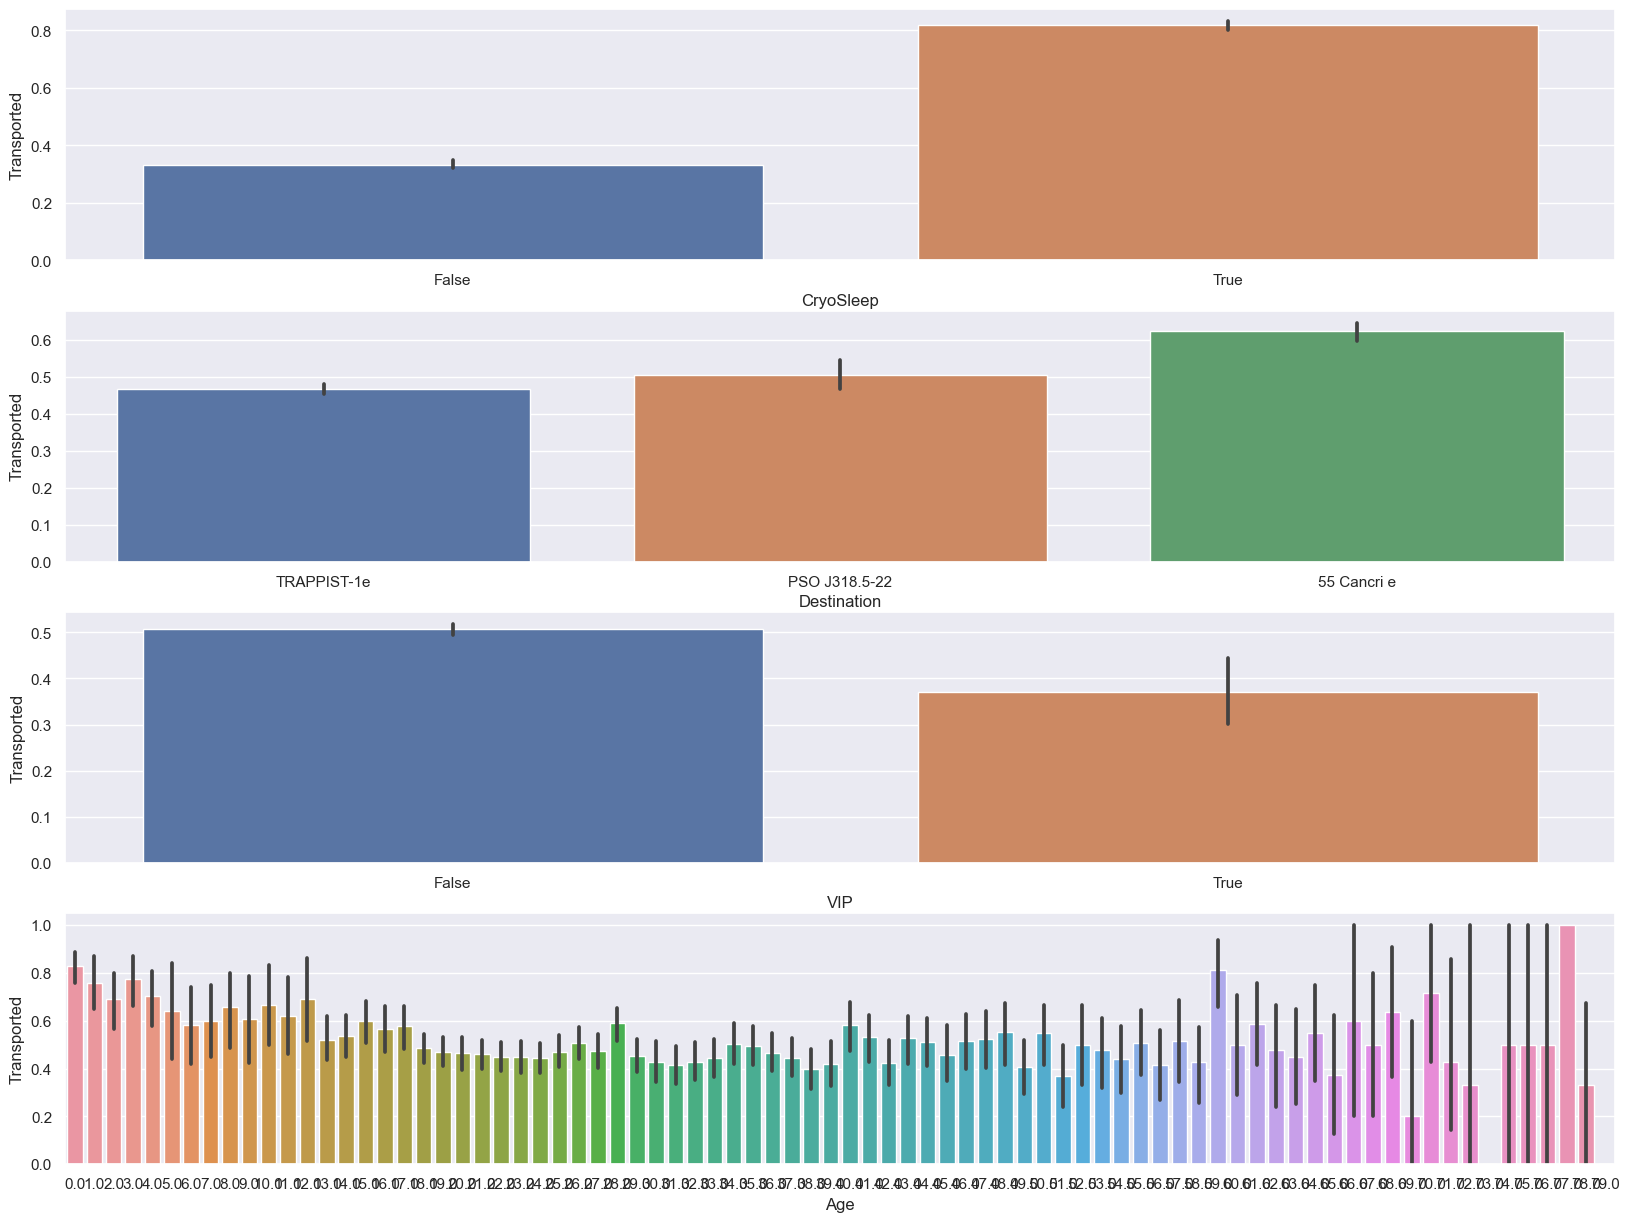

In [16]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(nrows=4, figsize=(20,15))
sn.barplot(x = train['CryoSleep'], y = train['Transported'],ax = ax1)
sn.barplot(x = train['Destination'], y = train['Transported'],ax = ax2)
sn.barplot(x = train['VIP'], y = train['Transported'],ax = ax3)
sn.barplot(x = train['Age'], y = train['Transported'],ax = ax4)


In [17]:
# train = train.drop(['Name','Deck','NumberOfPeople','Side'],axis=1)


# **Correlation Analysis**

C:\Users\Dinos\AppData\Local\Temp\ipykernel_10876\3968064699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()


<AxesSubplot: >

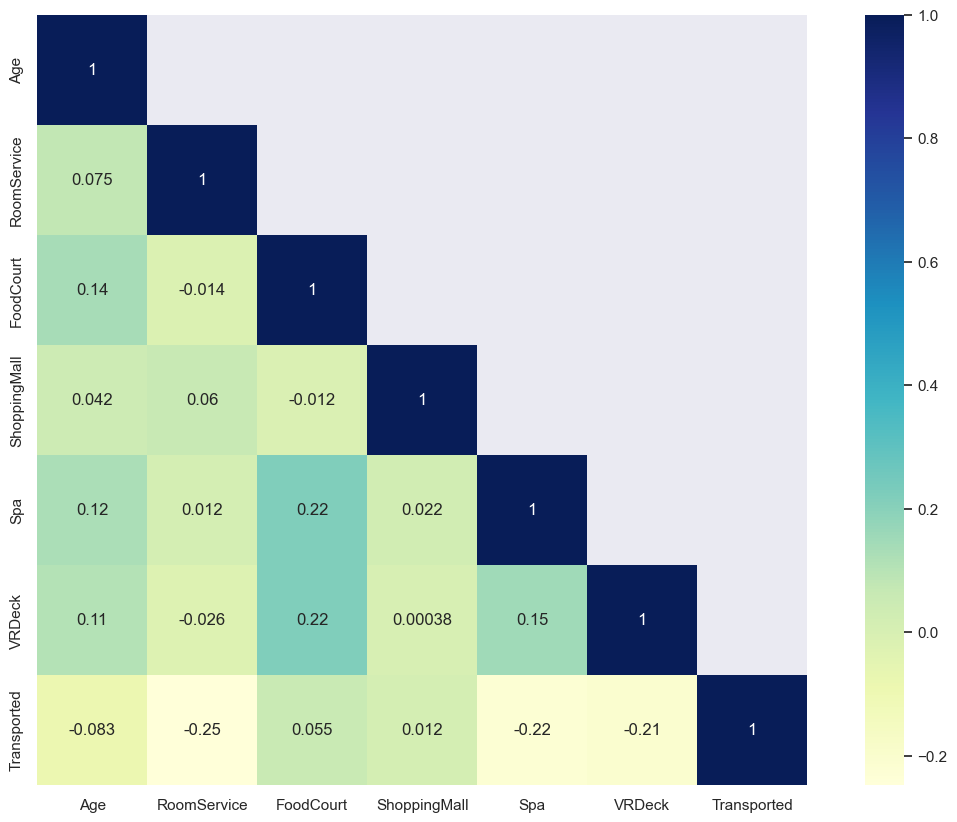

In [18]:
data_corr = train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
mask = np.array(data_corr)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(15, 10))
sn.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True, cmap="YlGnBu")

# **Building the model**

In [19]:
#train['Transported'] = train['Transported'].apply(lambda x: 1 if x == 'True' else 0 )

train['HomePlanet'] = train['HomePlanet'].apply(lambda x: 1 if x == 'Europa' else 0 if x=='Earth' else 2)
test['HomePlanet'] = test['HomePlanet'].apply(lambda x: 1 if x == 'Europa' else 0 if x=='Earth' else 2)

train['Destination'] = train['Destination'].apply(lambda x: 1 if x == 'TRAPPIST-1e' else 0 if x=='PSO J318.5-22' else 2)
test['Destination'] = test['Destination'].apply(lambda x: 1 if x == 'TRAPPIST-1e' else 0 if x=='PSO J318.5-22' else 2)

train = pd.get_dummies(train, columns=['HomePlanet'])
test = pd.get_dummies(test, columns=['HomePlanet'])

train = pd.get_dummies(train, columns=['Destination'])
test = pd.get_dummies(test, columns=['Destination'])

In [20]:
train.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'Destination_0',
       'Destination_1', 'Destination_2'],
      dtype='object')

In [26]:
x= train.drop(['Transported','Cabin','Name'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

pid = x_test.PassengerId
x_test.drop(['PassengerId'], axis=1)



log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
Y_prediction = log_model.predict(x_test)

In [28]:
output = pd.DataFrame({'PassengerId': pid, 'Transported': Y_prediction})
output.to_csv('Space_Titanic_first_attempt.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [36]:
output.sort_values(by='PassengerId', ascending= False)
print(output.loc[output['PassengerId'] == 0013_01])


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2265506332.py, line 2)